<a href="https://colab.research.google.com/github/Unlik3Pluto/Data-Storytelling/blob/main/Data_Storytelling_Cruz_Guzm%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de los Precios en los Diamantes**

En el siguiente Datasets de Diamantes se puede diferenciar las siguientes caracteristicas, como el tamaño, la claridad, los precios, las medidas de los diamantes, la profundidad a la cual fue encontrada y el ancho de lu lado mas ancho en la parte superior del diamante.

El analisis de este Dataset beneficiara a aquel usuario que quiera analizar como se organizaban los precios de los diamantes de acuerdo a caracteristicas que valora el mercado.

Los Variables tomadas en cuenta descritas anteriormente van de la siguiente manera:

1. Carat o Quilates que es el peso del diamante
2. Cut o Corte, es la calidad del corte del diamante
3. Color del diamante que va desde el peor (J) hasta el mejor (D)
4. Claridad siendo la medida en cuan claro es el diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor))
5. Depth o profundidad, siendo la distancia entre los puntos del alto del diamante explicados por la siguiente formula: z / mean(x, y) = 2 * z / (x + y) (43--79)
6. Table que es la medida de la parte superior del diamante
7. x = largo en mm
8. y = ancho en mm
9. z = alto en mm

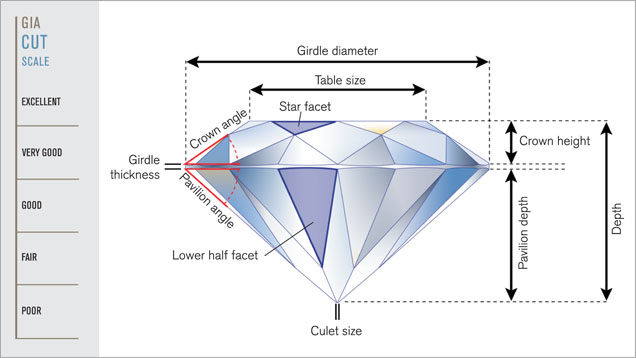

Hipotesis:


1.   Que caracteristica influencia mas el valor de los diamantes
2.   Los diamantes con mayor dimension son los mas valiosos


Siendo el Objetivo Principal: Diseñar un sistema que nos permita determinar el mejor precio de los diamantes en base a las anteriores caractericas.

Contexto Comercial: Esto se debe a que para extraer un diamante tambien incurre costos,y si el ingreso no supera los costos no podremos obtener rentabilidad de dicho proceso. Se determinara a traves de las caracteristicas cual de ellas son las que se repiten mas para determinar el precio mas alto del mercado para cada diamante.

Problema Comercial: Cuales son las caracteristicas que no agregan tanto valor a la hora de extraer diamantes y cuales son las que agregan mas valor?

Data adquisition: Para atender el problema se descargo una base de datos Kaggle en formato .csv mostrando columnas cuyos datos van de la mano con la información descrita en el primer parrafo.



# Preguntas de Interés sobre la Base de Datos

*   De la lista de Datos ¿Como es la distribución de los datos? es decir cuantos diamantes de cierto tamaño se encuentran en la base?, verificar por cada caracteristica
*   ¿Como son las caracteristicas principales por tipo de corte?
*   ¿Como es el precio promedio por cada tipo de corte?







**1. Importación del Dataset**

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount ('/content/gdrive')

df = pd.read_csv ('/content/gdrive/MyDrive/DATA SCIENCE CODERHOUSE/PROYECTO FINAL/1er PROYECTO FINAL/DATASET/diamonds.csv', sep=',')

df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**2. Identificación de Valores Nulos en el Dataset**

In [70]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Gracias a la identificación de valores nulos sabemos que en el dataset no hay valores vacios que puedan afectar al resultado de medicion de las variables, seguido a esto se cambiara los valores de las diferentes columnas que contienen texto para cambiar de valor cuantitativo a un valor cualitativo para poder ver las relaciones que afectan el precio, dandoles puntuaciones mayores a las mejores caracteristicas y las mas bajas a las peores.

In [71]:
df_2 = df
df_3 = pd.read_csv ('/content/gdrive/MyDrive/DATA SCIENCE CODERHOUSE/PROYECTO FINAL/1er PROYECTO FINAL/DATASET/diamonds.csv', sep=',')

#Se le añadira los valores segun lo calidad del corte, volviendo numericos los valores cualitativos
mapeo = {
    "Ideal": 5,
    "Premium": 4,
    "Very Good": 3,
    "Good": 2,
    "Fair": 1
}

#Se le añadira los valores segun los colores de los diamantes, esto determinado en la descripción del dataset descargado.
Colores = {
    "D": 7,
    "E": 6,
    "F": 5,
    "G": 4,
    "H":3,
    "I":2,
    "J":1,
}

#Y por ultimo se le cambiara el valor cualitativo de la claridad del diamante.
claridad = {
    "IF": 8,
    "VVS1": 7,
    "VVS2": 6,
    "VS1": 5,
    "VS2":4,
    "SI1":3,
    "SI2":2,
    "I1":1,
}

# Reemplazar los valores en la columna 'cut'
df_2['clarity'] = df_2['clarity'].replace(claridad)

# Reemplazar los valores en la columna 'cut'
df_2['color'] = df_2['color'].replace(Colores)

# Reemplazar los valores en la columna 'cut'
df_2['cut'] = df_2['cut'].replace(mapeo)

# Verificar los cambios
df_2.head()
print(df_3)



       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50000 rows x 10 columns]


In [72]:
df_2.describe().T[["mean","25%","std"]]

,mean,25%,std
carat,0.799444,0.40,0.475173
cut,3.902700,3.00,1.116717
color,4.401220,3.00,1.700418
clarity,4.047700,3.00,1.643532
depth,61.753006,61.00,1.431088
table,57.457830,56.00,2.232092
price,3944.805440,951.00,3997.938105
x,5.734403,4.71,1.123077
y,5.737956,4.72,1.145579
z,3.541056,2.91,0.707065


De los resultados anteriores, se puede ver la media de las caracteristicas a las cuales se le esta sometiendo el analisis, la calidad del corte es la caracteristica que a simple vista parece determinar un buen precio, mientras que los colores y las claridad se mantienen en un valor promedio a la escala sujeta a evaluación.

# Empezamos el analisis Exploratorio de los datos
Tomaremos como es la distribución de los datos por cada categoria

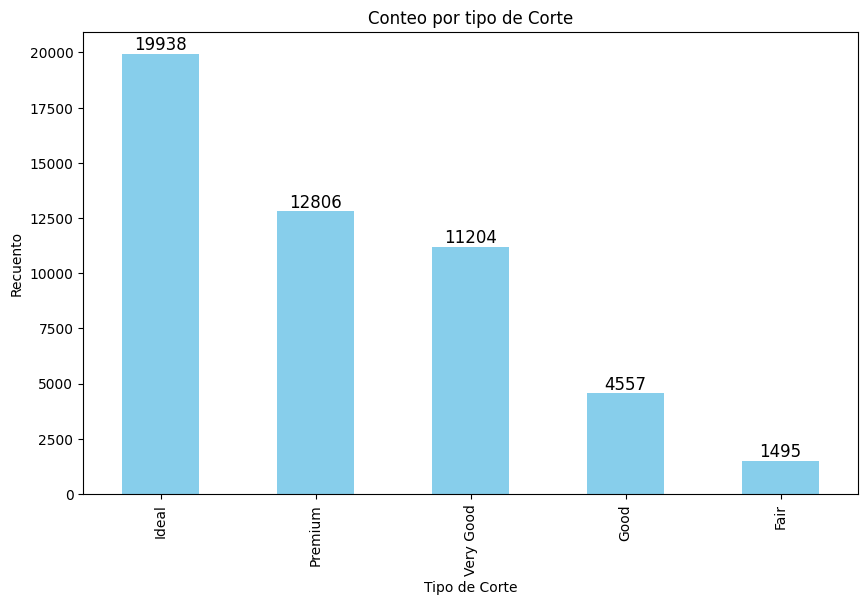

In [73]:
cut_counts = df_3['cut'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por tipo de Corte')
plt.xlabel('Tipo de Corte')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

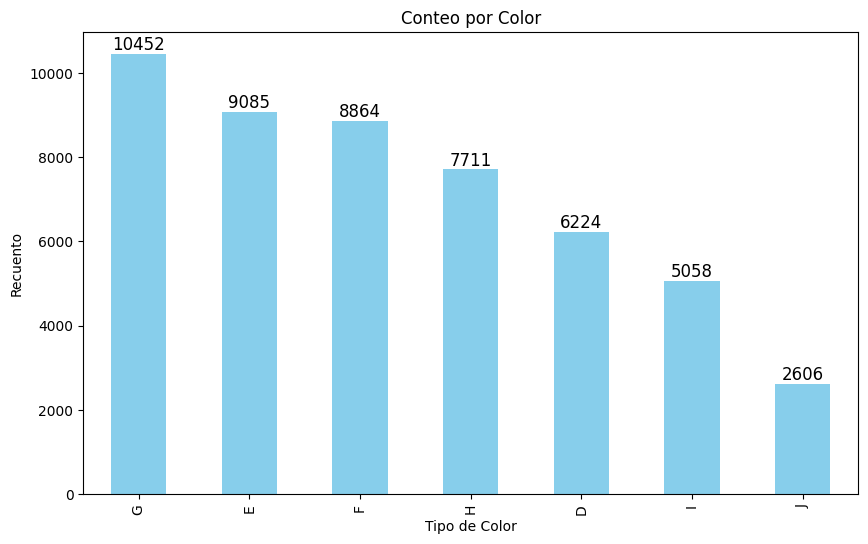

In [74]:
cut_counts = df_3['color'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Color')
plt.xlabel('Tipo de Color')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

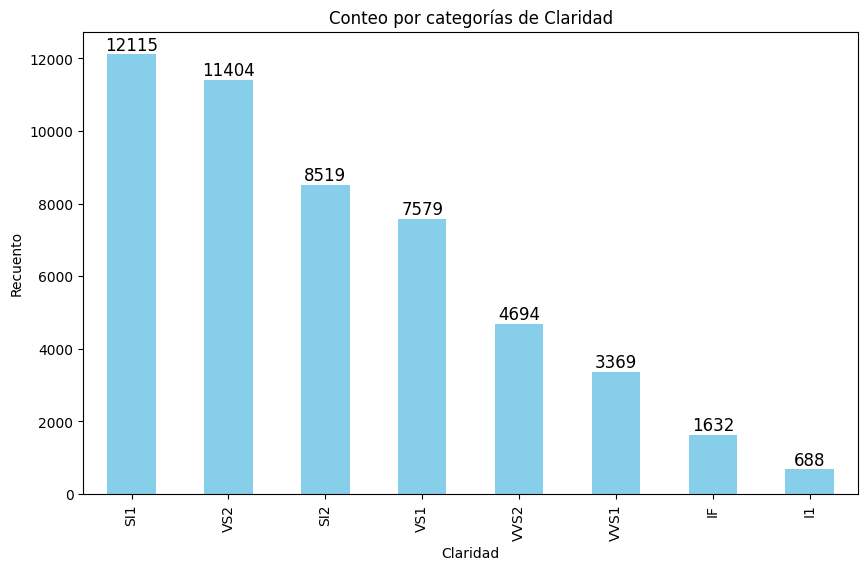

In [75]:
cut_counts = df_3['clarity'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por categorías de Claridad')
plt.xlabel('Claridad')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

Asi seguirian los datos por cada caracteristica cualitativa que presentan los diamantes, siguiendo con el analisis se vera la distribucion de datos por cada tipo de corte y como es determinado el precio en base a estos.

# Analisis Exploratorio por Tipo de Corte

1. Corte Ideal

In [76]:
corte_ideal_df = df_3[df_3['cut']=='Ideal']
corte_ideal_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
38,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [103]:
#Verificando que solo se muestre la caracteristica de corte de tipo "ideal"
cut_counts = corte_ideal_df['cut'].value_counts()
print (cut_counts)


Ideal    19938
Name: cut, dtype: int64


In [78]:
#Analisis de los valores cuantitativos
#Se extraera solo las columnas que deseamos analizar

columnas=['carat','depth','table','price','x','y','z']
Analisis_Ideal = corte_ideal_df[columnas]
Analisis_Ideal.describe().T[["mean","25%","std","max","min"]]

,mean,25%,std,max,min
carat,0.703685,0.35,0.433234,3.50,0.2
depth,61.709219,61.30,0.720053,66.70,43.0
table,55.952157,55.00,1.247808,63.00,43.0
price,3463.090230,877.00,3810.637262,18806.00,326.0
x,5.509539,4.54,1.065077,9.65,0.0
y,5.522381,4.55,1.076541,31.80,0.0
z,3.402737,2.80,0.658134,6.03,0.0


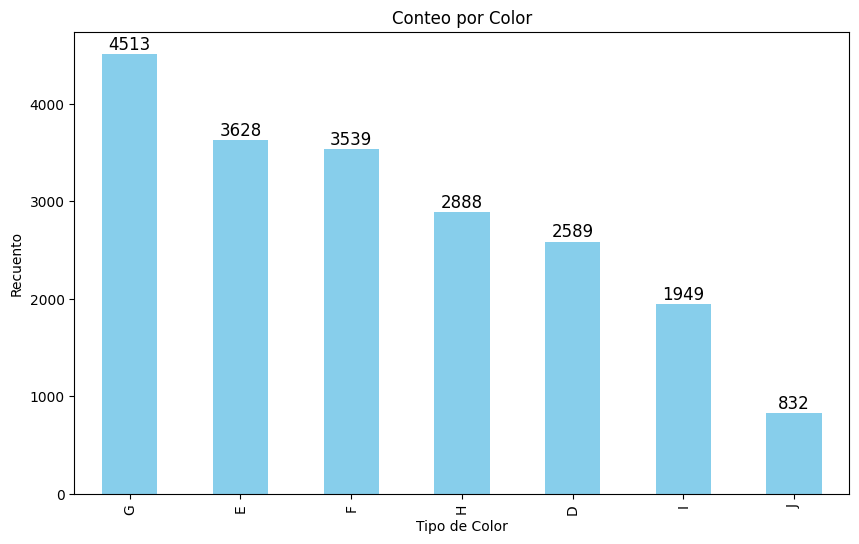

In [79]:
cut_counts = corte_ideal_df['color'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Color')
plt.xlabel('Tipo de Color')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

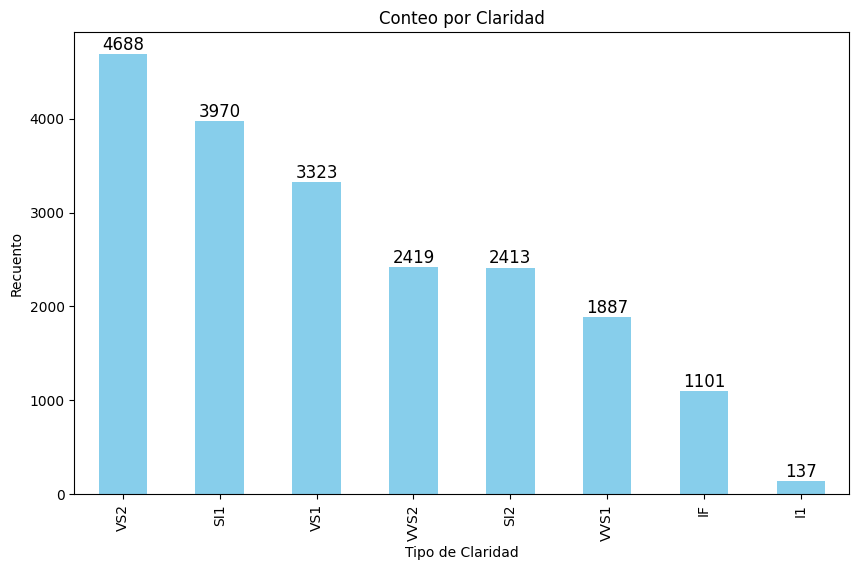

In [80]:
cut_counts = corte_ideal_df['clarity'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Claridad')
plt.xlabel('Tipo de Claridad')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

2. Corte Premium

In [81]:
corte_Premium_df = df_3[df_3['cut']=='Premium']
corte_Premium_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68


In [82]:

columnas=['carat','depth','table','price','x','y','z']
Analisis_Premium = corte_Premium_df[columnas]
Analisis_Premium.describe().T[["mean","25%","std","max","min"]]

,mean,25%,std,max,min
carat,0.894423,0.41,0.517092,4.01,0.2
depth,61.264282,60.50,1.158270,63.00,58.0
table,58.746775,58.00,1.470902,62.00,51.0
price,4607.382867,1046.00,4364.870806,18823.00,326.0
x,5.978847,4.80,1.190906,10.14,0.0
y,5.950287,4.79,1.268201,58.90,0.0
z,3.650673,2.94,0.732025,8.06,0.0


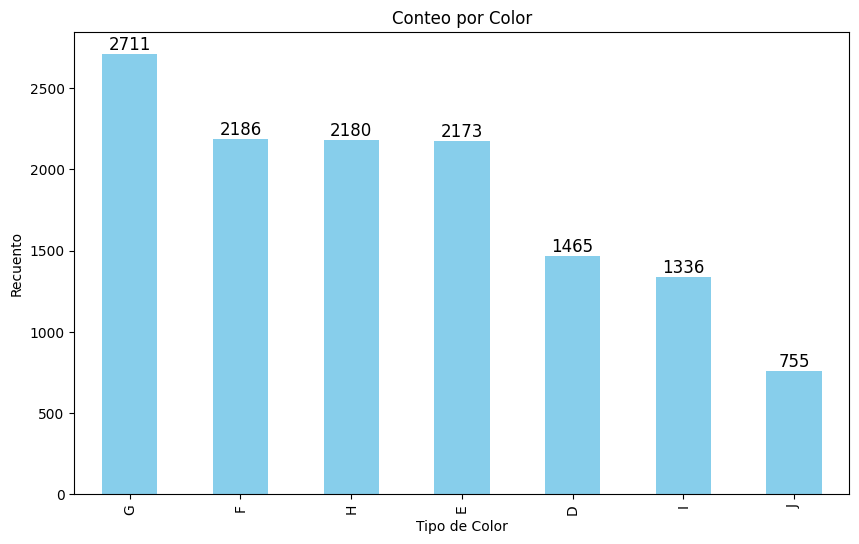

In [83]:
cut_counts = corte_Premium_df['color'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Color')
plt.xlabel('Tipo de Color')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

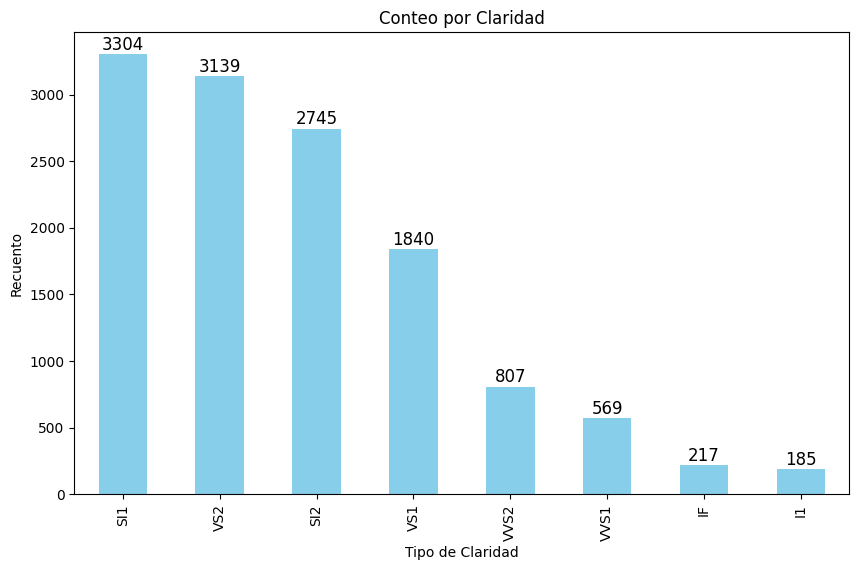

In [84]:
cut_counts = corte_Premium_df['clarity'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Claridad')
plt.xlabel('Tipo de Claridad')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

3. Corte "Muy Bueno"

In [90]:
corte_Muybueno_df = df_3[df_3['cut']=='Very Good']
corte_Muybueno_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
19,0.30,Very Good,J,SI1,62.7,59.0,351,4.21,4.27,2.66


In [91]:
columnas=['carat','depth','table','price','x','y','z']
Analisis_Muybueno = corte_Muybueno_df[columnas]
Analisis_Muybueno.describe().T[["mean","25%","std","max","min"]]

,mean,25%,std,max,min
carat,0.806406,0.4100,0.460272,4.00,0.2
depth,61.819823,60.9000,1.379390,64.90,56.8
table,57.954722,56.0000,2.119532,66.00,44.0
price,3986.585594,909.0000,3946.071323,18818.00,336.0
x,5.740220,4.7475,1.101966,10.01,0.0
y,5.769537,4.7700,1.104021,9.94,0.0
z,3.559770,2.9500,0.734441,31.80,0.0


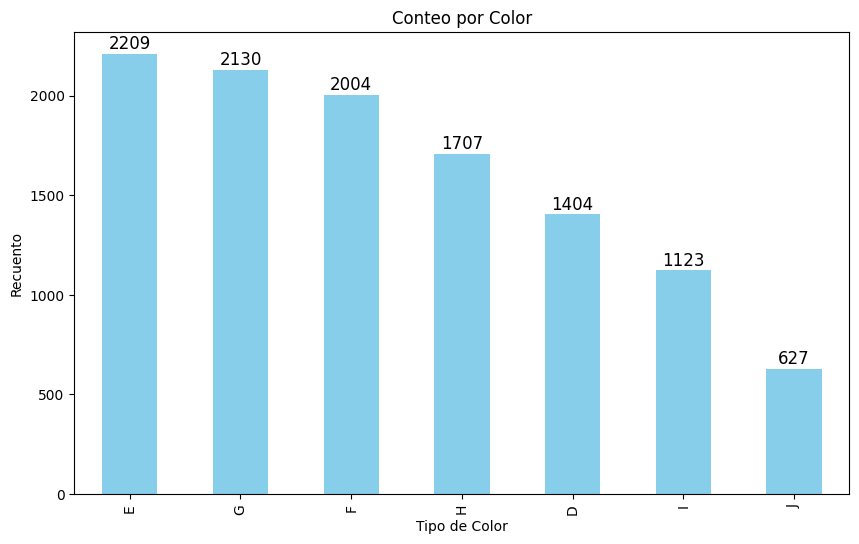

In [92]:
cut_counts = corte_Muybueno_df['color'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Color')
plt.xlabel('Tipo de Color')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

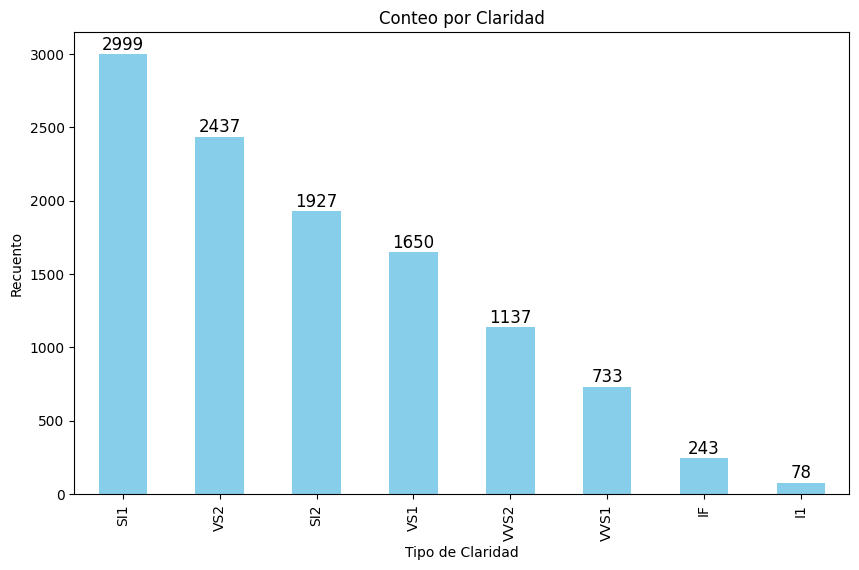

In [93]:
cut_counts = corte_Muybueno_df['clarity'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Claridad')
plt.xlabel('Tipo de Claridad')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

4. Corte "Bueno"

In [94]:
corte_Bueno_df = df_3[df_3['cut']=='Good']
corte_Bueno_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
18,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71


In [95]:
columnas=['carat','depth','table','price','x','y','z']
Analisis_Bueno = corte_Bueno_df[columnas]
Analisis_Bueno.describe().T[["mean","25%","std","max","min"]]

,mean,25%,std,max,min
carat,0.853588,0.50,0.454981,3.01,0.23
depth,62.385056,61.30,2.163451,67.00,54.30
table,58.679877,56.00,2.852641,66.00,51.00
price,3961.470266,1163.00,3699.780864,18788.00,327.00
x,5.850136,5.03,1.052794,9.44,0.00
y,5.862293,5.03,1.047222,9.38,0.00
z,3.647595,3.09,0.652594,5.79,0.00


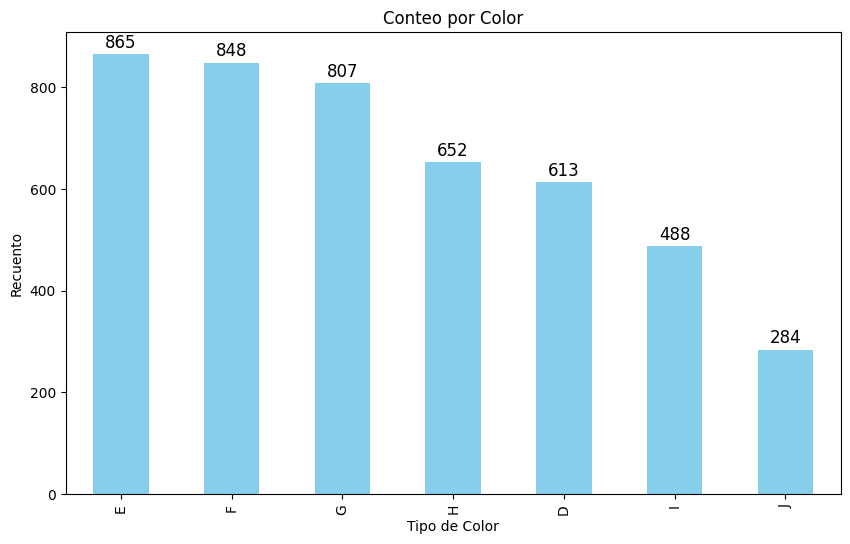

In [96]:
cut_counts = corte_Bueno_df['color'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Color')
plt.xlabel('Tipo de Color')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

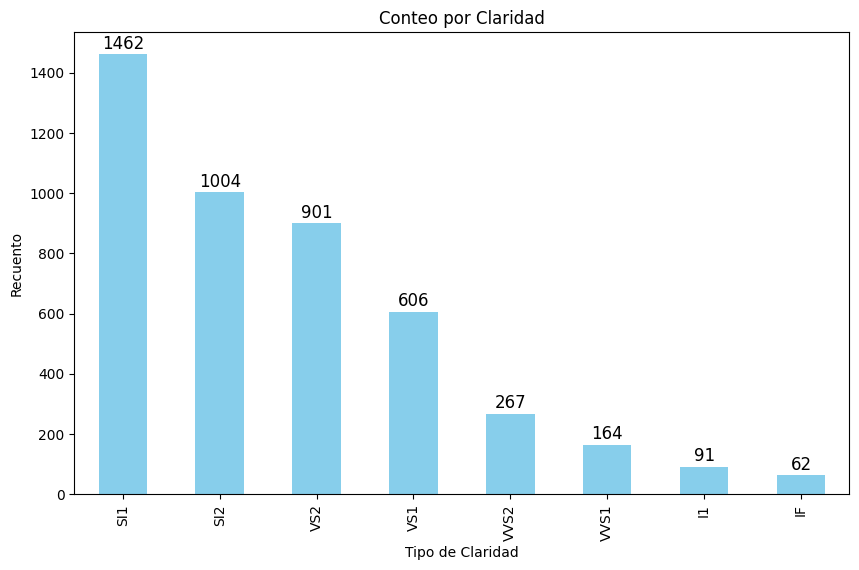

In [97]:
cut_counts = corte_Bueno_df['clarity'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Claridad')
plt.xlabel('Tipo de Claridad')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

5. Corte "Justo"


In [98]:
corte_Justo_df = df_3[df_3['cut']=='Fair']
corte_Justo_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
83,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
89,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
113,0.70,Fair,F,VS2,64.5,57.0,2762,5.57,5.53,3.58
114,0.70,Fair,F,VS2,65.3,55.0,2762,5.63,5.58,3.66


In [99]:
columnas=['carat','depth','table','price','x','y','z']
Analisis_Justo = corte_Justo_df[columnas]
Analisis_Justo.describe().T[["mean","25%","std","max","min"]]

,mean,25%,std,max,min
carat,1.045726,0.70,0.519999,5.01,0.22
depth,64.095987,64.40,3.572515,79.00,43.00
table,59.048361,56.00,3.934447,95.00,49.00
price,4329.705017,2048.50,3508.516630,18574.00,337.00
x,6.243057,5.62,0.971927,10.74,0.00
y,6.178488,5.56,0.964123,10.54,0.00
z,3.981779,3.61,0.651801,6.98,0.00


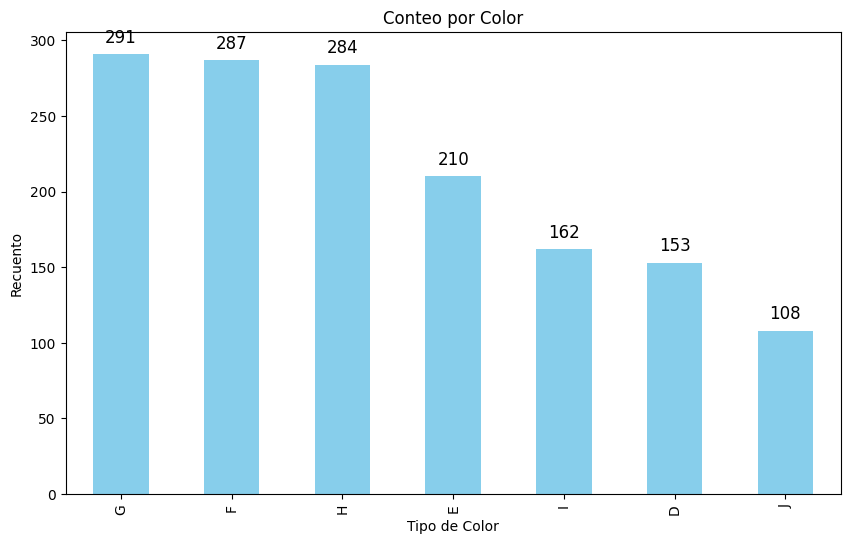

In [100]:
cut_counts = corte_Justo_df['color'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Color')
plt.xlabel('Tipo de Color')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

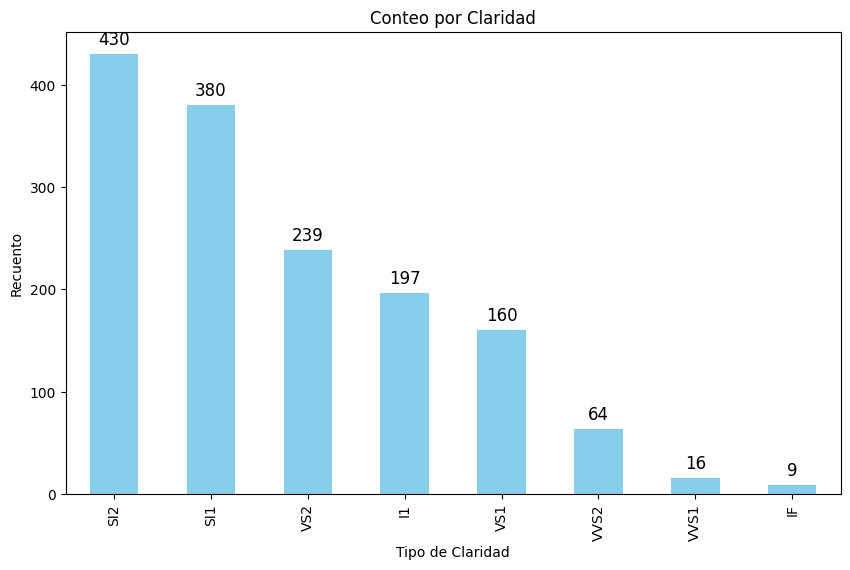

In [101]:
cut_counts = corte_Justo_df['clarity'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cut_counts.plot(kind='bar', color='skyblue')

# Agrega etiquetas con el recuento en cada barra
for i, v in enumerate(cut_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Personaliza el gráfico
plt.title('Conteo por Claridad')
plt.xlabel('Tipo de Claridad')
plt.ylabel('Recuento')

# Muestra el gráfico
plt.show()

Los resultados por cada tipo de corte fueron los siguientes, a continuacion se procedera de los datos generales generar la relación del precio cada variable para determinar cual de todos ellos tiene mayor influencia en el precio.

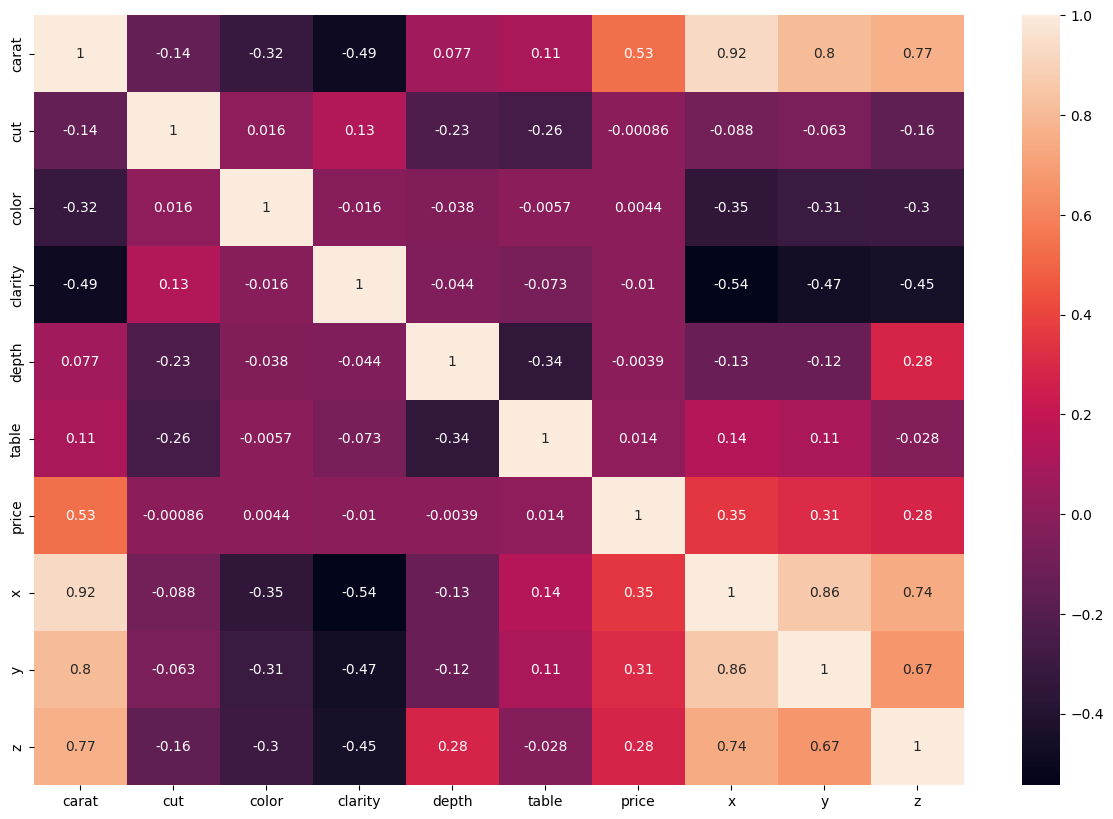

In [85]:
plt.figure (figsize = (15,10))
sns.heatmap (df.pct_change().corr(), annot = True);

Del grafico de calor se puede apreciar que la variable con mayor significancia con el precio son los quilates (carat).


In [86]:
#Evaluaremos con respecto al volumen segun las dimensiones del diamante

df ['volumen'] = df ['x'] * df ['y'] * df ['z']

df_nuevo = df[['carat','cut','color','clarity','depth','table','price','volumen']]

print (df_nuevo)

       carat  cut  color  clarity  depth  table  price     volumen
0       0.23    5      6        2   61.5   55.0    326   38.202030
1       0.21    4      6        3   59.8   61.0    326   34.505856
2       0.23    2      6        5   56.9   65.0    327   38.076885
3       0.29    4      2        4   62.4   58.0    334   46.724580
4       0.31    2      1        2   63.3   58.0    335   51.917250
...      ...  ...    ...      ...    ...    ...    ...         ...
49995   0.72    5      7        3   60.8   57.0   2757  115.920000
49996   0.72    2      7        3   63.1   55.0   2757  118.110175
49997   0.70    3      7        3   62.8   60.0   2757  114.449728
49998   0.86    4      3        2   61.0   58.0   2757  140.766120
49999   0.75    5      7        2   62.2   55.0   2757  124.568444

[50000 rows x 8 columns]


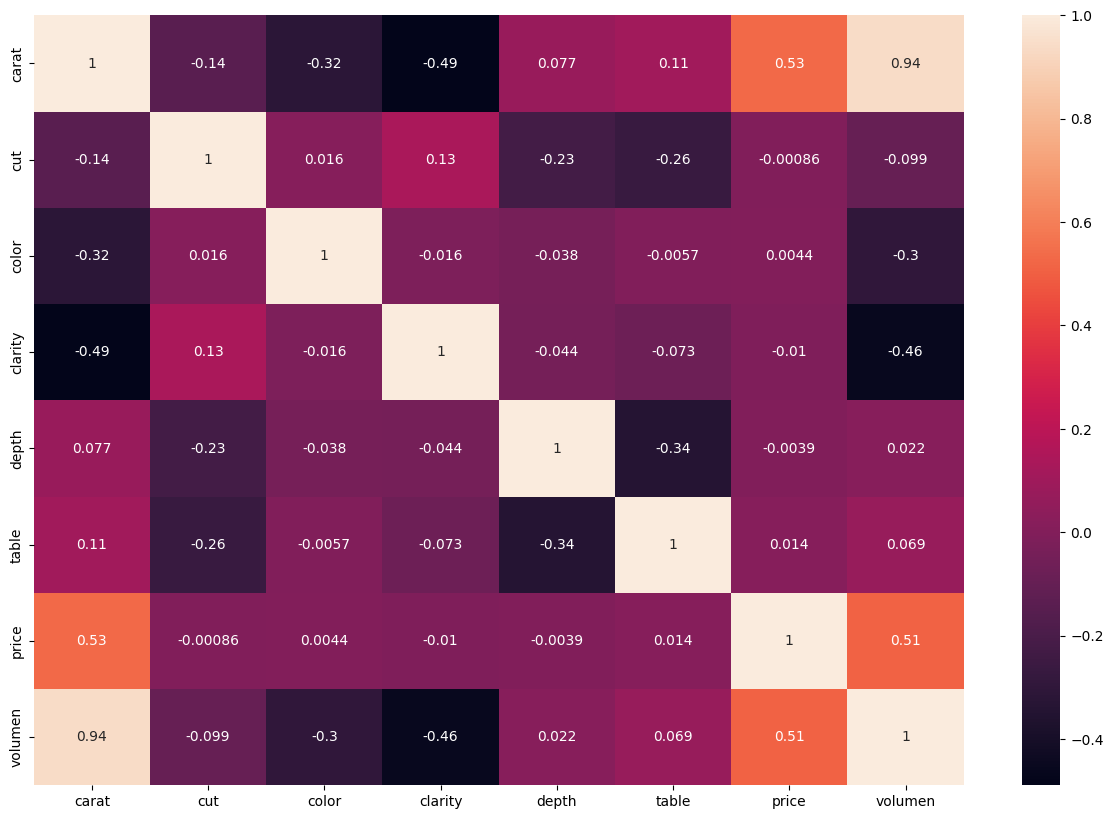

In [87]:
plt.figure (figsize = (15,10))
sns.heatmap (df_nuevo.pct_change().corr(), annot = True);

Como se pudo observar el volumen del diamante esta muy relacionado al valor de los quilates que este posee, sin embargo aun asi la variable determinante para conocer el precio sigue siendo los quilates.

Conclusiones: para determinar el precio de un diamante se puede determinar por las caracteristicas en el orden que mas influyen:

1.   Quilates
2.   Volumen
3.   Table
4.   Color
5.   Corte
6.   Profundidad
7.   Claridad

Se hara una correlación sobre como socila el precio con respecto al volumen, a traves de un diagrama de dispersion, evaluando asi el comportamiento.

In [88]:

Evaluacion_df = df_nuevo[["price","volumen"]]
Evaluacion_df.head()



,price,volumen
0,326,38.202030
1,326,34.505856
2,327,38.076885
3,334,46.724580
4,335,51.917250


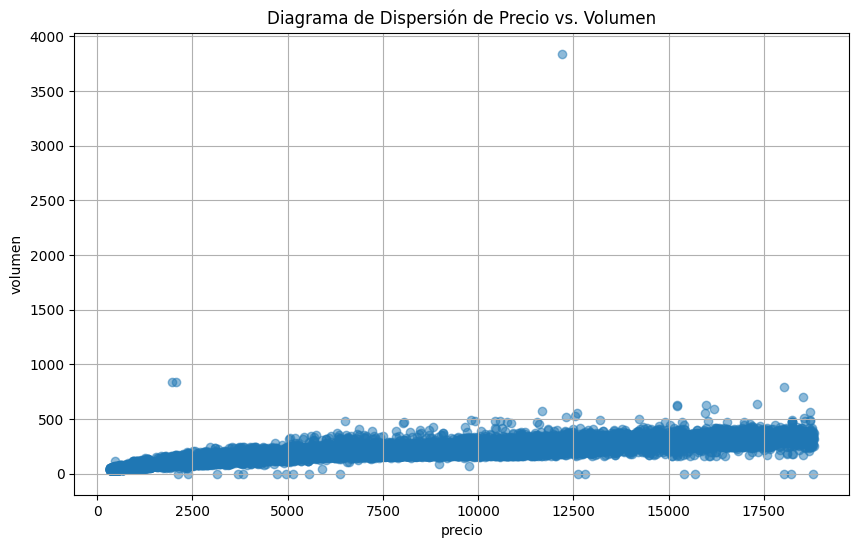

In [89]:
precio = Evaluacion_df["price"]
volumen = Evaluacion_df["volumen"]

plt.figure(figsize=(10, 6))
plt.scatter(precio, volumen, alpha=0.5)
plt.title('Diagrama de Dispersión de Precio vs. Volumen')
plt.xlabel('precio')
plt.ylabel('volumen')
plt.grid(True)
plt.show()

Se ve una relación entre los precios y el volumen de los diamantes,